In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
from requests_oauthlib import OAuth1
import time

In [2]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('10ef12fa480c441db5a034c5bf817491'))

In [9]:
results = spotify.search(q='artist:' + 'Mozart', type='artist')
artist_url = 'spotify:artist:4NJhFmfw43RLBLjQvxDuRS'
results = spotify.artist_top_tracks(artist_url)

In [10]:
import json
with open('maestro-v1.0.0.json', 'r+') as f:
    dic = json.load(f)

In [111]:
def search_spotify(q):
    results = spotify.search(q=q, type='track')
    result_idx = 0  # always take first result for now
    if len(results['tracks']['items']) == 0:
        return None, None, None
    artist_name = results['tracks']['items'][result_idx]['artists'][0]['name']
    track_name = results['tracks']['items'][result_idx]['name']
    track_id = results['tracks']['items'][result_idx]['id']
    return artist_name, track_name, track_id

In [ ]:
from tqdm import tqdm 
# res = []
# no_result = []

for idx in tqdm(range(1128, len(dic))):
    cur_dict = {}
    cur_dict['q_composer'] = dic[idx]['canonical_composer']
    cur_dict['q_title'] = dic[idx]['canonical_title']
    q = dic[idx]['canonical_composer'] + ' ' + dic[idx]['canonical_title']
    
    artist_name, track_name, track_id = search_spotify(q)
    if artist_name is None:
        # no result
        no_result.append((dic[idx]['canonical_composer'], dic[idx]['canonical_title']))
        print(idx, dic[idx]['canonical_composer'], dic[idx]['canonical_title'])
    cur_dict['r_composer'] = artist_name
    cur_dict['r_title'] = track_name
    cur_dict['r_id'] = track_id
    
    endpoint = 'https://api.spotify.com/v1/audio-features/{}'.format(track_id)
    token = "BQCRPyWRMWrzMjSDNT7Yw8zhcLSD0T7I66QqnuxyakfYjucHCpcqA_4ansKb2A5uQsK1YIKRGB8B_Fa7BXoY42UP7HHzxeXbC_6qIffClCUl6CTouLNBEnaHBYsMaaFMt4H2xr1R6VNDb3o2Xg"
    headers = {"Authorization": "Bearer " + token}
    x = requests.get(endpoint, headers=headers)
    if x.status_code != 200:
        print(x.status_code)
        if x.status_code not in [400]:
            print("Index:", idx)
            break
    new_d = json.loads(x.content)
    
    cur_dict['res'] = new_d
    res.append(cur_dict)
    time.sleep(2.5)

In [164]:
filtered_res = []
tbd_res = []
dustbin_res = []

for i in range(len(res)):
    print(i, "/", len(res))
    print(res[i]['q_composer'], res[i]['q_title'], '|', res[i]['r_composer'], res[i]['r_title'])
    txt_input = input()
    if txt_input == ",":
        filtered_res.append(res[i])
    elif txt_input == ".":
        tbd_res.append(res[i])
    else:
        dustbin_res.append(res[i])

0 / 1179
Alban Berg Sonata Op. 1 | Alban Berg Piano Sonata, Op.1
,
1 / 1179
Alban Berg Sonata Op. 1 | Alban Berg Piano Sonata, Op.1
,
2 / 1179
Alexander Scriabin 24 Preludes Op. 11, No. 13-24 | Alexander Scriabin 24 Preludes, Op. 11: No. 13 in G-Flat Major
.
3 / 1179
Alexander Scriabin 3 Etudes, Op. 65 | Alexander Scriabin 3 Etudes, Op. 65: No. 3 Molto vivace
.
4 / 1179
Alexander Scriabin 5 Preludes, Op.15 | Alexander Scriabin Five Preludes, Op. 15: No. 4 - Andantino
.
5 / 1179
Alexander Scriabin Entragete, Op.63 | None None
/
6 / 1179
Alexander Scriabin Etude Op. 2 No.1;  Etudes Op. 8, Nos. 5, 11 and 12 | None None
/
7 / 1179
Alexander Scriabin Etude Op. 42, Nos. 4 & 5 | Alexander Scriabin 8 Études, Op. 42: No. 5 in C-Sharp Minor
.
8 / 1179
Alexander Scriabin Etude Op. 8, No. 13 | Alexander Scriabin 12 Etudes, Op. 8 (1894): No. 12 in D-Sharp Minor: Patetico
.
9 / 1179
Alexander Scriabin Etude in D-flat Major, Op. 8 No. 10 | Alexander Scriabin 12 Etudes for piano, Op.8: Etude Op. 8, No

,
76 / 1179
Domenico Scarlatti Sonata K. 466 | Domenico Scarlatti Sonata in F Minor, K. 466 (L. 118)
,
77 / 1179
Domenico Scarlatti Sonata K. 525 | Domenico Scarlatti Sonata in F Major, K 525 (L 188)
,
78 / 1179
Domenico Scarlatti Sonata K. 54 | Domenico Scarlatti Keyboard Sonata in B-Flat Major, K.545/L.500/P.549: Prestissimo
/
79 / 1179
Domenico Scarlatti Sonata in A Major, K. 208 | Domenico Scarlatti Sonata in A Major, K. 208, L. 238 - Live
,
80 / 1179
Domenico Scarlatti Sonata in B Minor, K. 197 | Domenico Scarlatti Keyboard Sonata in B Minor, K.197/L.147/P.124: Andante
,
81 / 1179
Domenico Scarlatti Sonata in B Minor, K. 87 | Domenico Scarlatti Sonata in B Minor, K.87
,
82 / 1179
Domenico Scarlatti Sonata in B Minor, K. 87 | Domenico Scarlatti Sonata in B Minor, K.87
,
83 / 1179
Domenico Scarlatti Sonata in B Minor, L. 33 | Domenico Scarlatti Keyboard Sonata in B Minor, K.87/L.33/P.43
/
84 / 1179
Domenico Scarlatti Sonata in C Major, K. 179 | Domenico Scarlatti Keyboard Sonata in 

,
145 / 1179
Franz Liszt Concert Etude "Gnomenreigen" | Franz Liszt 2 Etudes de Concert, S.145: No.2 Gnomenreigen
,
146 / 1179
Franz Liszt Concert Etude "Gnomenreigen" | Franz Liszt 2 Etudes de Concert, S.145: No.2 Gnomenreigen
,
147 / 1179
Franz Liszt Concert Etude "La Leggierezza" | Franz Liszt 3 Etudes de Concert, S.144: No.2 In F Minor "La leggierezza" (A capriccio - Quasi allegretto)
,
148 / 1179
Franz Liszt Concert Etude "La Leggierezza" | Franz Liszt 3 Etudes de Concert, S.144: No.2 In F Minor "La leggierezza" (A capriccio - Quasi allegretto)
,
149 / 1179
Franz Liszt Concert Etude "La Leggierezza" | Franz Liszt 3 Etudes de Concert, S.144: No.2 In F Minor "La leggierezza" (A capriccio - Quasi allegretto)
,
150 / 1179
Franz Liszt Concert Etude "La Leggierezza" | Franz Liszt 3 Etudes de Concert, S.144: No.2 In F Minor "La leggierezza" (A capriccio - Quasi allegretto)
,
151 / 1179
Franz Liszt Concert Etude "La Leggierezza" | Franz Liszt 3 Etudes de Concert, S.144: No.2 In F Minor "L

/
214 / 1179
Franz Liszt Rigoletto Paraphrase | Franz Liszt 6 Consolations, S. 172: No. 3 In D Flat Major (Lento, placido)
/
215 / 1179
Franz Liszt Réminiscences de Don Juan, S.418 | Franz Liszt Réminiscences de Don Juan, S. 418 (after Mozart): Réminiscences de Don Juan, S. 418 (After Mozart) - Live
,
216 / 1179
Franz Liszt Sonata in B Min. | Franz Liszt Piano Sonata In B Minor, S.178: Lento assai - Allegro energico
,
217 / 1179
Franz Liszt Sonata in B Min. | Franz Liszt Piano Sonata In B Minor, S.178: Lento assai - Allegro energico
,
218 / 1179
Franz Liszt Sonata in B Minor, S. 178 | Franz Liszt Piano Sonata In B Minor, S.178: Lento assai - Allegro energico
,
219 / 1179
Franz Liszt Sonata in B Minor, S. 178 | Franz Liszt Piano Sonata In B Minor, S.178: Lento assai - Allegro energico
,
220 / 1179
Franz Liszt Sonata in B Minor, S. 178 | Franz Liszt Piano Sonata In B Minor, S.178: Lento assai - Allegro energico
,
221 / 1179
Franz Liszt Sonata in B Minor, S. 178 | Franz Liszt Piano Sonata

,
272 / 1179
Franz Schubert Impromptu Op. 142 No. 3 in B-flat Major | Franz Schubert 4 Impromptus, Op. 142, D. 935: No. 3 in B-Flat Major
,
273 / 1179
Franz Schubert Impromptu Op. 142 No. 3 in B-flat Major | Franz Schubert 4 Impromptus, Op. 142, D. 935: No. 3 in B-Flat Major
,
274 / 1179
Franz Schubert Impromptu Op. 142 No. 3 in B-flat Major | Franz Schubert 4 Impromptus, Op. 142, D. 935: No. 3 in B-Flat Major
,
275 / 1179
Franz Schubert Impromptu Op. 142 No. 3 in B-flat Major | Franz Schubert 4 Impromptus, Op. 142, D. 935: No. 3 in B-Flat Major
,
276 / 1179
Franz Schubert Impromptu Op. 142 No. 3 in B-flat Major | Franz Schubert 4 Impromptus, Op. 142, D. 935: No. 3 in B-Flat Major
,
277 / 1179
Franz Schubert Impromptu Op. 142 No. 3 in B-flat Major | Franz Schubert 4 Impromptus, Op. 142, D. 935: No. 3 in B-Flat Major
,
278 / 1179
Franz Schubert Impromptu Op. 142 No. 3 in B-flat Major | Franz Schubert 4 Impromptus, Op. 142, D. 935: No. 3 in B-Flat Major
,
279 / 1179
Franz Schubert Improm

.
337 / 1179
Franz Schubert Sonata in A D960 | Franz Schubert Schubert: 6 Moments musicaux, Op. 94, D. 780: No. 3 in F Minor (Allegro moderato)
/
338 / 1179
Franz Schubert Sonata in A D960 | Franz Schubert Schubert: 6 Moments musicaux, Op. 94, D. 780: No. 3 in F Minor (Allegro moderato)
/
339 / 1179
Franz Schubert Sonata in A D960 | Franz Schubert Schubert: 6 Moments musicaux, Op. 94, D. 780: No. 3 in F Minor (Allegro moderato)
/
340 / 1179
Franz Schubert Sonata in A D961 | None None
/
341 / 1179
Franz Schubert Sonata in A D961 | None None
/
342 / 1179
Franz Schubert Sonata in A D961 | None None
/
343 / 1179
Franz Schubert Sonata in A D962 | None None
/
344 / 1179
Franz Schubert Sonata in A Major, D. 664 (Complete) | Franz Schubert Sonata in A major, D. 664: II. Andante
.
345 / 1179
Franz Schubert Sonata in A Major, D. 664, I. Allegro moderato | Franz Schubert Piano Sonata No. 13 in A Major, Op. 120, D. 664: I. Allegro moderato
,
346 / 1179
Franz Schubert Sonata in A Major, D. 959 (Com

/
403 / 1179
Franz Schubert Sonata in C Minor, D958 | Franz Schubert Piano Sonata No.19 in C minor, D.958: 4. Allegro
/
404 / 1179
Franz Schubert Sonata in C Minor, D958 | Franz Schubert Piano Sonata No.19 in C minor, D.958: 4. Allegro
/
405 / 1179
Franz Schubert Sonata in C Minor, D958 | Franz Schubert Piano Sonata No.19 in C minor, D.958: 4. Allegro
/
406 / 1179
Franz Schubert Sonata in C Minor, D958 | Franz Schubert Piano Sonata No.19 in C minor, D.958: 4. Allegro
/
407 / 1179
Franz Schubert Sonata in C Minor, D958 | Franz Schubert Piano Sonata No.19 in C minor, D.958: 4. Allegro
/
408 / 1179
Franz Schubert Sonata in C Minor, D958 | Franz Schubert Piano Sonata No.19 in C minor, D.958: 4. Allegro
/
409 / 1179
Franz Schubert Sonata in C major, D. 840 (Complete) | Franz Schubert Sonata in C Major, D. 840
/
410 / 1179
Franz Schubert Sonata in D Major, D. 850 (Complete) | Franz Schubert Schubert: Piano Sonata No. 17 in D Major, D. 850: I. Allegro
.
411 / 1179
Franz Schubert Sonata in D M

,
461 / 1179
Frédéric Chopin Ballade 4 Op. 52 | Frédéric Chopin Ballade No. 4 in F Minor, Op. 52
,
462 / 1179
Frédéric Chopin Ballade 4 Op. 52 | Frédéric Chopin Ballade No. 4 in F Minor, Op. 52
,
463 / 1179
Frédéric Chopin Ballade 4 Op. 52 | Frédéric Chopin Ballade No. 4 in F Minor, Op. 52
,
464 / 1179
Frédéric Chopin Ballade 4 Op. 52 | Frédéric Chopin Ballade No. 4 in F Minor, Op. 52
,
465 / 1179
Frédéric Chopin Ballade No. 1 in G Minor, Op. 23 | Frédéric Chopin Ballade No. 1 in G Minor, Op. 23
,
466 / 1179
Frédéric Chopin Ballade No. 1 in G Minor, Op. 23 | Frédéric Chopin Ballade No. 1 in G Minor, Op. 23
,
467 / 1179
Frédéric Chopin Ballade No. 1 in G Minor, Op. 23 | Frédéric Chopin Ballade No. 1 in G Minor, Op. 23
,
468 / 1179
Frédéric Chopin Ballade No. 1 in G Minor, Op. 23 | Frédéric Chopin Ballade No. 1 in G Minor, Op. 23
,
469 / 1179
Frédéric Chopin Ballade No. 1 in G Minor, Op. 23 | Frédéric Chopin Ballade No. 1 in G Minor, Op. 23
,
470 / 1179
Frédéric Chopin Ballade No. 1 in G

/
538 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly's Wings"
/
539 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly's Wings"
/
540 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly's Wings"
/
541 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly's Wings"
/
542 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly's Wings"
/
543 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly's Wings"
/
544 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Major "Butterfly's Wings"
/
545 / 1179
Frédéric Chopin Etude Op. 25 No. 12 | Frédéric Chopin 12 Études, Op. 25: No. 9 in G-Flat Ma

,
606 / 1179
Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op.31 | Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op. 31
,
607 / 1179
Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op.31 | Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op. 31
,
608 / 1179
Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op.31 | Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op. 31
,
609 / 1179
Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op.31 | Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op. 31
,
610 / 1179
Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op.31 | Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op. 31
,
611 / 1179
Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op.31 | Frédéric Chopin Scherzo No. 2 in B-Flat Minor, Op. 31
,
612 / 1179
Frédéric Chopin Scherzo No. 3 | Frédéric Chopin Scherzo No. 3 in C-Sharp Minor, Op. 39
,
613 / 1179
Frédéric Chopin Scherzo No. 3 in C-sharp Minor, Op. 39 | Frédéric Chopin Scherzo No. 3 in C-Sharp Minor, Op. 39
,
614 / 1179
Frédéric Chopin Scherzo No. 4 

.
674 / 1179
Johann Sebastian Bach Partita No. 1 in B-Flat Major, BWV 825 (Complete) | Johann Sebastian Bach Partita No. 1 in B-Flat Major, BWV 825: VI. Giga
.
675 / 1179
Johann Sebastian Bach Partita No. 2 in C Minor, I. Sinfonia | Johann Sebastian Bach Partita No. 2 in C Minor, BWV 826: I. Sinfonia
,
676 / 1179
Johann Sebastian Bach Partita No. 6 in E Minor | Johann Sebastian Bach Partita No.6 in E minor, BWV 830: 3. Corrente
.
677 / 1179
Johann Sebastian Bach Partita in C Minor, BWV 826 | Johann Sebastian Bach Partita in C Minor, BWV 826: II. Allemande
.
678 / 1179
Johann Sebastian Bach Prelude & Fugue | Johann Sebastian Bach Prelude & Fugue in E Major (Well-Tempered Clavier, Book I, No. 9), BWV 854: Fugue
.
679 / 1179
Johann Sebastian Bach Prelude & Fugue | Johann Sebastian Bach Prelude & Fugue in E Major (Well-Tempered Clavier, Book I, No. 9), BWV 854: Fugue
.
680 / 1179
Johann Sebastian Bach Prelude and Fugue in  F-sharp Major, WTC I , BWV 858 | Walter Gieseking Johann Sebastian 

,
722 / 1179
Johann Sebastian Bach Prelude and Fugue in C Major, WTC II, BWV 846 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in C Major, BWV 846
,
723 / 1179
Johann Sebastian Bach Prelude and Fugue in C Major, WTC II, BWV 846 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in C Major, BWV 846
,
724 / 1179
Johann Sebastian Bach Prelude and Fugue in C Major, WTC II, BWV 846 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in C Major, BWV 846
,
725 / 1179
Johann Sebastian Bach Prelude and Fugue in C Major, WTC II, BWV 846 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in C Major, BWV 846
,
726 / 1179
Johann Sebastian Bach Prelude and Fugue in C Major, WTC II, BWV 846 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in C Major, BWV 846
,
727 / 1179
Johann Sebastian Bach Prelude and Fugue in C Major, WTC II, BWV 846 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, 

769 / 1179
Johann Sebastian Bach Prelude and Fugue in G Major, WTC I | Walter Gieseking Johann Sebastian Bach: WTC Book 2, Prelude and Fugue in E Major, BWV 878
/
770 / 1179
Johann Sebastian Bach Prelude and Fugue in G Major, WTC I | Walter Gieseking Johann Sebastian Bach: WTC Book 2, Prelude and Fugue in E Major, BWV 878
/
771 / 1179
Johann Sebastian Bach Prelude and Fugue in G Major, WTC I, BWV 860 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in G Major, BWV 860
,
772 / 1179
Johann Sebastian Bach Prelude and Fugue in G Major, WTC I, BWV 860 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in G Major, BWV 860
,
773 / 1179
Johann Sebastian Bach Prelude and Fugue in G Major, WTC I, BWV 860 | Walter Gieseking Johann Sebastian Bach: WTC Book 1, Prelude and Fugue in G Major, BWV 860
,
774 / 1179
Johann Sebastian Bach Prelude and Fugue in G Minor, WTC II | Walter Gieseking Johann Sebastian Bach: WTC Book 2, Prelude and Fugue in G Minor, BWV 

.
823 / 1179
Johannes Brahms Sonata No. 1 in C Major, Op. 1 | Johannes Brahms Violin Sonata No. 1 in G Major, Op. 78 "Regen": II. Adagio
.
824 / 1179
Johannes Brahms Sonata No. 3 in F Minor, Op. 5 | Johannes Brahms Piano Sonata No.3 in F Minor, Op.5: 4. Intermezzo (Andante molto)
.
825 / 1179
Johannes Brahms Sonata No. 3 in F Minor, Op. 5 | Johannes Brahms Piano Sonata No.3 in F Minor, Op.5: 4. Intermezzo (Andante molto)
.
826 / 1179
Johannes Brahms Sonata No. 3 in F Minor, Op. 5 | Johannes Brahms Piano Sonata No.3 in F Minor, Op.5: 4. Intermezzo (Andante molto)
.
827 / 1179
Johannes Brahms Sonata No. 3 in F Minor, Op. 5 | Johannes Brahms Piano Sonata No.3 in F Minor, Op.5: 4. Intermezzo (Andante molto)
.
828 / 1179
Johannes Brahms Sonata No. 3 in F Minor, Op. 5 | Johannes Brahms Piano Sonata No.3 in F Minor, Op.5: 4. Intermezzo (Andante molto)
.
829 / 1179
Johannes Brahms Variations and Fugue on the Theme of Händel, Op. 24 | Johannes Brahms Variations and Fugue on a Theme of Handel, O

/
888 / 1179
Ludwig van Beethoven Sonata No. 15 in D Major, Op. 28, I. Allegro | Ludwig van Beethoven Piano Sonata No. 15 in D Major, Op. 28 "Pastoral": I. Allegro
,
889 / 1179
Ludwig van Beethoven Sonata No. 16 Op. 31 No. 1 in G Major, I. Allegro vivace | Ludwig van Beethoven Piano Sonata No. 16 in G Major, Op. 31 No. 1: I. Allegro vivace
,
890 / 1179
Ludwig van Beethoven Sonata No. 16 Op. 31 No. 1 in G Major, I. Allegro vivace | Ludwig van Beethoven Piano Sonata No. 16 in G Major, Op. 31 No. 1: I. Allegro vivace
,
891 / 1179
Ludwig van Beethoven Sonata No. 16 in G Major, Op. 31 No. 1, I. and II.  | Ludwig van Beethoven Piano Sonata No. 16 in G Major, Op. 31 No. 1: III. Rondo: Allegretto
/
892 / 1179
Ludwig van Beethoven Sonata No. 16 in G Major, Op. 31 No. 1, I. and II.  | Ludwig van Beethoven Piano Sonata No. 16 in G Major, Op. 31 No. 1: III. Rondo: Allegretto
/
893 / 1179
Ludwig van Beethoven Sonata No. 16 in G Major, Op. 31 No. 1, I. and II.  | Ludwig van Beethoven Piano Sonata No

,
942 / 1179
Ludwig van Beethoven Sonata No. 3 in C Major, Op. 2 No. 3, I. Allegro con brio | Ludwig van Beethoven Sonata No. 3 in C Major, Op. 2 No. 3: I. Allegro con brio
,
943 / 1179
Ludwig van Beethoven Sonata No. 3 in C Major, Op. 2 No. 3, I. Allegro con brio | Ludwig van Beethoven Sonata No. 3 in C Major, Op. 2 No. 3: I. Allegro con brio
,
944 / 1179
Ludwig van Beethoven Sonata No. 3 in C Major, Op. 2 No. 3, I. Allegro con brio | Ludwig van Beethoven Sonata No. 3 in C Major, Op. 2 No. 3: I. Allegro con brio
,
945 / 1179
Ludwig van Beethoven Sonata No. 3 in F Minor, Op. 5 | Ludwig van Beethoven Piano Sonata No. 5 In C Minor, Op. 10, No. 1: 3. Finale (Prestissimo) - Live
/
946 / 1179
Ludwig van Beethoven Sonata No. 31 in A-flat Major, Op. 110 (Complete) | Ludwig van Beethoven Piano Sonata No. 31 in A-Flat Major, Op. 110: I. Moderato cantabile molto espressivo
.
947 / 1179
Ludwig van Beethoven Sonata No. 31 in A-flat Major, Op. 110 (Complete) | Ludwig van Beethoven Piano Sonata No. 

,
993 / 1179
Ludwig van Beethoven Thirty-Two Variations in C minor, WoO 80     | Ludwig van Beethoven Thirty-Two Variations on an Original Theme in C Minor, WoO. 80
,
994 / 1179
Ludwig van Beethoven Thirty-Two Variations in C minor, WoO 80     | Ludwig van Beethoven Thirty-Two Variations on an Original Theme in C Minor, WoO. 80
,
995 / 1179
Ludwig van Beethoven Thirty-Two Variations in C minor, WoO 80     | Ludwig van Beethoven Thirty-Two Variations on an Original Theme in C Minor, WoO. 80
,
996 / 1179
Ludwig van Beethoven Thirty-Two Variations in C minor, WoO 80     | Ludwig van Beethoven Thirty-Two Variations on an Original Theme in C Minor, WoO. 80
,
997 / 1179
Ludwig van Beethoven Thirty-Two Variations in C minor, WoO 80     | Ludwig van Beethoven Thirty-Two Variations on an Original Theme in C Minor, WoO. 80
,
998 / 1179
Ludwig van Beethoven Thirty-Two Variations in C minor, WoO 80     | Ludwig van Beethoven Thirty-Two Variations on an Original Theme in C Minor, WoO. 80
,
999 / 11

,
1058 / 1179
Robert Schumann Carnaval, Op. 9 | Robert Schumann Carnaval, Op. 9: 12. Chopin
,
1059 / 1179
Robert Schumann Davidsbundlertanze, Op. 6 | Robert Schumann Davidsbündlertänze, Op.6: 2. Innig
,
1060 / 1179
Robert Schumann Fantasy Pieces, Op. 12 | Robert Schumann Fantasy Pieces Op. 12
,
1061 / 1179
Robert Schumann Gesänge der Frühe, Op. 133 | Robert Schumann Gesänge der Frühe, Op.133 (1853): 1. Im ruhigen Tempo
.
1062 / 1179
Robert Schumann Humoresque, Op. 20 | Robert Schumann Humoresque in B-Flat Major, Op. 20: IV. Innig
.
1063 / 1179
Robert Schumann Intermezzi, Op. 4 | Robert Schumann Intermezzi, Op. 4 (1832): Intermezzi, Op. 4 (1832): Allegro
,
1064 / 1179
Robert Schumann Kreisleriana | Robert Schumann Kreisleriana, Op.16: 4. Sehr langsam
.
1065 / 1179
Robert Schumann Kreisleriana, Op. 16 | Robert Schumann Kreisleriana, Op.16: 4. Sehr langsam
.
1066 / 1179
Robert Schumann Kreisleriana, Op. 16 | Robert Schumann Kreisleriana, Op.16: 4. Sehr langsam
.
1067 / 1179
Robert Schuman

,
1123 / 1179
Sergei Rachmaninoff Prelude Op. 23/4 | Sergei Rachmaninoff 10 Preludes, Op. 23: No. 4 in D Major: Andante cantabile
,
1124 / 1179
Sergei Rachmaninoff Prelude Op. 32 No. 8 in A Minor | Sergei Rachmaninoff 13 Preludes, Op. 32: No. 8 in A Minor: Vivo
,
1125 / 1179
Sergei Rachmaninoff Prelude Op. 32, No. 10 | Sergei Rachmaninoff Prelude in B Minor, Op. 32, No. 10 - Live at Philharmonie, Berlin / 2018
,
1126 / 1179
Sergei Rachmaninoff Prelude Op. 32/5 | Sergei Rachmaninoff 13 Préludes op.32: No.5 in G major - Live At The Royal Albert Hall/2012
,
1127 / 1179
Sergei Rachmaninoff Prelude in C-sharp Minor, Op. 3, No. 2 | Sergei Rachmaninoff Prélude in C sharp minor, Op.3, No.2
,
1128 / 1179
Sergei Rachmaninoff Prelude in D Major, Op. 23, No. 4 | Sergei Rachmaninoff 10 Preludes, Op. 23: No. 4 in D Major: Andante cantabile
,
1129 / 1179
Sergei Rachmaninoff Prelude in D Major, Op. 23, No. 4 | Sergei Rachmaninoff 10 Preludes, Op. 23: No. 4 in D Major: Andante cantabile
,
1130 / 1179
S

Counter({0: 452, 1: 168, 3: 29, 2: 22})


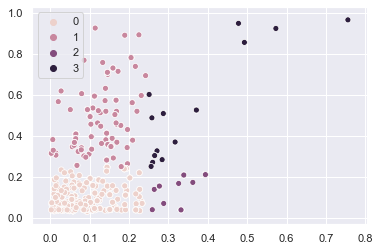

In [177]:
arousal = []
valence = []
for item in filtered_res:
    arousal.append(item['res']['energy'])
    valence.append(item['res']['valence'])

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

color = []
for i in range(len(arousal)):
    if arousal[i] < 0.25 and valence[i] < 0.25:
        color.append(0)
    elif arousal[i] < 0.25 and valence[i] >= 0.25:
        color.append(1)
    elif arousal[i] >= 0.25 and valence[i] < 0.25:
        color.append(2)
    else:
        color.append(3)
from collections import Counter
print(Counter(color))
sns.scatterplot(arousal, valence, hue=color)
plt.show()

In [96]:
new_d['energy']

0.335

In [179]:
with open("filtered_yamaha_emotion.json", "w+") as f:
    json.dump(filtered_res, f)

In [180]:
with open("tbd_yamaha_emotion.json", "w+") as f:
    json.dump(tbd_res, f)

In [181]:
with open("dustbin_yamaha_emotion.json", "w+") as f:
    json.dump(dustbin_res, f)